# Decision Tree

This notebook shows the Decision Tree model for bank marketing

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [28]:
df = pd.read_csv("bank-additional-clean.csv")

In [29]:
df.shape

(15859, 42)

In [30]:
df.head()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40,0,1,0,7,2,180,1,999,1,...,0,0,0,1,0,1,0,1,0,0
1,49,0,0,0,4,1,464,2,999,0,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,0,4,0,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,54,0,1,0,4,1,111,2,999,0,...,1,0,0,0,0,0,1,0,1,0
4,57,0,1,1,0,1,45,1,999,1,...,0,0,0,0,1,1,0,1,0,0


### Modelling

1. Split dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Set up timer
t = Timer()

## Decision Trees 

For decision trees, I used 2 implementation described as "Base" and "Advanced"

Base model
- Criterion: Entropy
- No pruning

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
dt_base = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dt_base.fit(X_train, y_train)
y_pred_dt_base_train = dt_base.predict(X_train)
y_pred_dt_base_test = dt_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_dt_base_train)
precision_train = precision_score(y_train, y_pred_dt_base_train)
recall_train = recall_score(y_train, y_pred_dt_base_train)
f1_train = f1_score(y_train, y_pred_dt_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_base_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_base_test)
precision_test = precision_score(y_test, y_pred_dt_base_test)
recall_test = recall_score(y_test, y_pred_dt_base_test)
f1_test = f1_score(y_test, y_pred_dt_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_base_test)

print(f"Train Accuracy of Base Decision Tree: {accuracy_train:.3f}")
print(f"Train Precision of Base Decision Tree: {precision_train:.3f}")
print(f"Train Recall of Base Decision Tree: {recall_train:.3f}")
print(f"Train F1 of Base Decision Tree: {f1_train:.3f}")
print(f"Train ROC AUC of Base Decision Tree: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Base Decision Tree: {accuracy_test:.3f}")
print(f"Test Precision of Base Decision Tree: {precision_test:.3f}")
print(f"Test Recall of Base Decision Tree: {recall_test:.3f}")
print(f"Test F1 of Base Decision Tree: {f1_test:.3f}")
print(f"Test ROC AUC of Base Decision Tree: {roc_auc_test:.3f}")

Elapsed time: 0.0585 seconds
Train Accuracy of Base Decision Tree: 1.000
Train Precision of Base Decision Tree: 1.000
Train Recall of Base Decision Tree: 1.000
Train F1 of Base Decision Tree: 1.000
Train ROC AUC of Base Decision Tree: 1.000
---
Test Accuracy of Base Decision Tree: 0.846
Test Precision of Base Decision Tree: 0.666
Test Recall of Base Decision Tree: 0.686
Test F1 of Base Decision Tree: 0.676
Test ROC AUC of Base Decision Tree: 0.790


In [34]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
dt_base_res = cross_validate(
      estimator=dt_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.2443 seconds


In [35]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(dt_base_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(dt_base_res[m]):.3f}")

train_accuracy: 1.000
train_precision: 1.000
train_recall: 1.000
train_f1: 1.000
----
test_accuracy: 0.833
test_precision: 0.658
test_recall: 0.684
test_f1: 0.670


Plot learning curve of decision tree

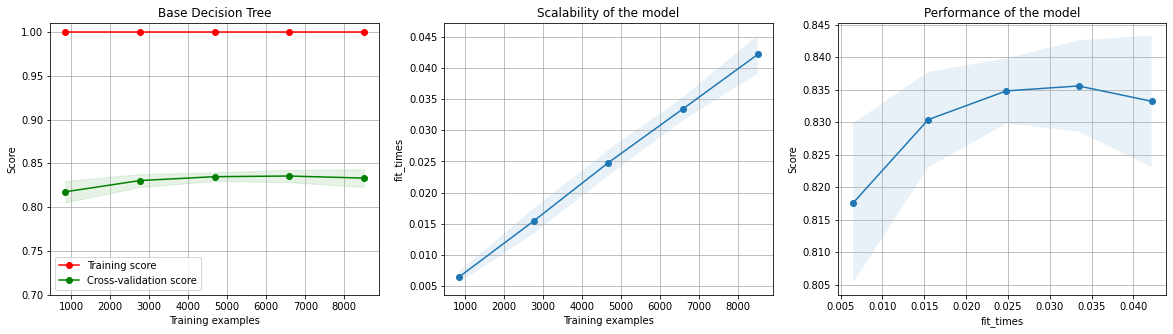

In [36]:
title = "Base Decision Tree"
plot_learning_curve(
    dt_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [37]:
y_pred_dt_base_train = cross_val_predict(dt_base, X_train, y_train, cv=5)
y_pred_dt_base_test = cross_val_predict(dt_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_dt_base_train)
precision_train = precision_score(y_train, y_pred_dt_base_train)
recall_train = recall_score(y_train, y_pred_dt_base_train)
f1_train = f1_score(y_train, y_pred_dt_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_base_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_base_test)
precision_test = precision_score(y_test, y_pred_dt_base_test)
recall_test = recall_score(y_test, y_pred_dt_base_test)
f1_test = f1_score(y_test, y_pred_dt_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_base_test)

print(f"Train Accuracy of Base Decision Tree: {accuracy_train:.3f}")
print(f"Train Precision of Base Decision Tree: {precision_train:.3f}")
print(f"Train Recall of Base Decision Tree: {recall_train:.3f}")
print(f"Train F1 of Base Decision Tree: {f1_train:.3f}")
print(f"Train ROC AUC of Base Decision Tree: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Base Decision Tree: {accuracy_test:.3f}")
print(f"Test Precision of Base Decision Tree: {precision_test:.3f}")
print(f"Test Recall of Base Decision Tree: {recall_test:.3f}")
print(f"Test F1 of Base Decision Tree: {f1_test:.3f}")
print(f"Test ROC AUC of Base Decision Tree: {roc_auc_test:.3f}")

Train Accuracy of Base Decision Tree: 0.833
Train Precision of Base Decision Tree: 0.657
Train Recall of Base Decision Tree: 0.684
Train F1 of Base Decision Tree: 0.670
Train ROC AUC of Base Decision Tree: 0.783
---
Test Accuracy of Base Decision Tree: 0.835
Test Precision of Base Decision Tree: 0.645
Test Recall of Base Decision Tree: 0.660
Test F1 of Base Decision Tree: 0.652
Test ROC AUC of Base Decision Tree: 0.775


Pruning methodology

Text(0, 0.5, 'total impurity of leaves')

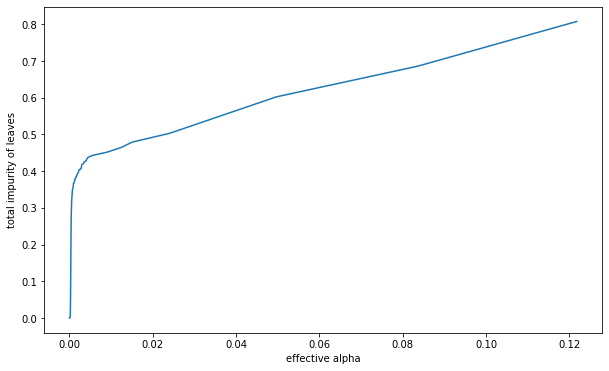

In [38]:
path = dt_base.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [39]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

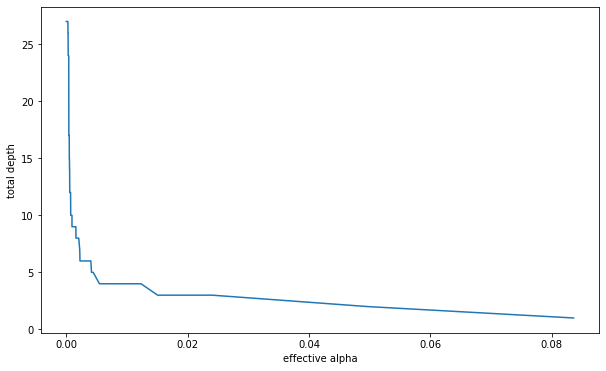

In [40]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


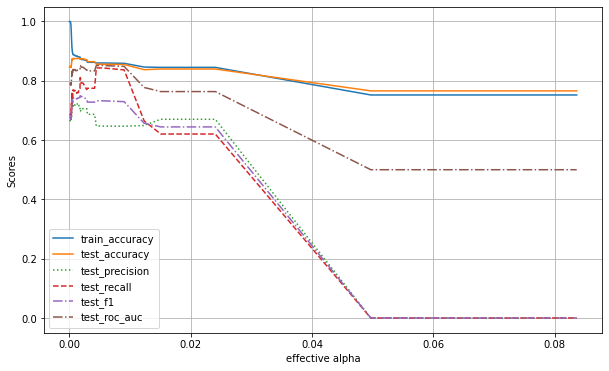

In [41]:
train_accuracy_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

test_recall_scores = [recall_score(y_test, clf.predict(X_test)) for clf in clfs]
test_precision_scores = [precision_score(y_test, clf.predict(X_test)) for clf in clfs]
test_f1_scores = [f1_score(y_test, clf.predict(X_test)) for clf in clfs]
test_roc_auc_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], train_accuracy_scores[:-1], label="train_accuracy")
plt.plot(ccp_alphas[:-1], test_accuracy_scores[:-1], label="test_accuracy")
plt.plot(ccp_alphas[:-1], test_precision_scores[:-1], label="test_precision", linestyle="dotted")
plt.plot(ccp_alphas[:-1], test_recall_scores[:-1], label="test_recall", linestyle="dashed")
plt.plot(ccp_alphas[:-1], test_f1_scores[:-1], label="test_f1", linestyle="dashdot")
plt.plot(ccp_alphas[:-1], test_roc_auc_scores[:-1], label="test_roc_auc", linestyle="dashdot")
plt.xlabel("effective alpha")
plt.ylabel("Scores")
plt.legend()

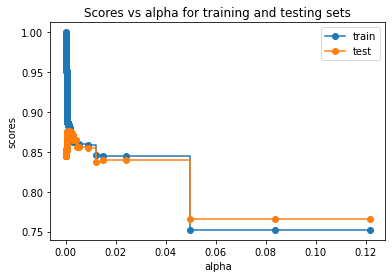

In [42]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("scores")
ax.set_title("Scores vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [43]:
print(f"For the best F1 score: {max(test_f1_scores)}")
highest_score_index = test_f1_scores.index(max(test_f1_scores))
print(f"Train Accuracy: {train_accuracy_scores[highest_score_index]}")
print(f"Test Accuracy: {test_accuracy_scores[highest_score_index]}")
print(f"Test Precision: {test_precision_scores[highest_score_index]}")
print(f"Test Recall: {test_recall_scores[highest_score_index]}")
print(f"Test F1: {test_f1_scores[highest_score_index]}")
print(f"Test ROC AUC: {test_roc_auc_scores[highest_score_index]}")
best_alpha = ccp_alphas[:-1][highest_score_index]
print(f"The best alpha to set is {best_alpha:.5f}")

For the best F1 score: 0.7491512636740854
Train Accuracy: 0.8754823529411765
Test Accuracy: 0.8729461215131831
Test Precision: 0.6963534361851332
Test Recall: 0.8106122448979591
Test F1: 0.7491512636740854
Test ROC AUC: 0.8513026303063006
The best alpha to set is 0.00175


Advanced model
- Criterion: Entropy
- With cross validation (k=5)
- With pruning, best alpha

In [18]:
t.start()
dt_adv = DecisionTreeClassifier(
    criterion = "entropy", 
    random_state = 0, 
    ccp_alpha=best_alpha
)
dt_adv.fit(X_train, y_train)
y_pred_dt_adv_train = dt_adv.predict(X_train)
y_pred_dt_adv_test = dt_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_dt_adv_train)
precision_train = precision_score(y_train, y_pred_dt_adv_train)
recall_train = recall_score(y_train, y_pred_dt_adv_train)
f1_train = f1_score(y_train, y_pred_dt_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_adv_test)
precision_test = precision_score(y_test, y_pred_dt_adv_test)
recall_test = recall_score(y_test, y_pred_dt_adv_test)
f1_test = f1_score(y_test, y_pred_dt_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_adv_test)

print(f"Train Accuracy of Advanced Decision Tree with best alpha: {accuracy_train:.3f}")
print(f"Train Precision of Advanced Decision Tree with best alpha: {precision_train:.3f}")
print(f"Train Recall of Advanced Decision Tree with best alpha: {recall_train:.3f}")
print(f"Train F1 of Advanced Decision Tree with best alpha: {f1_train:.3f}")
print(f"Train ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of Advanced Decision Tree with best alpha: {accuracy_test:.3f}")
print(f"Test Precision of Advanced Decision Tree with best alpha: {precision_test:.3f}")
print(f"Test Recall of Advanced Decision Tree with best alpha: {recall_test:.3f}")
print(f"Test F1 of Advanced Decision Tree with best alpha: {f1_test:.3f}")
print(f"Test ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_test:.3f}")

Elapsed time: 0.0521 seconds
Train Accuracy of Advanced Decision Tree with best alpha: 0.875
Train Precision of Advanced Decision Tree with best alpha: 0.714
Train Recall of Advanced Decision Tree with best alpha: 0.829
Train F1 of Advanced Decision Tree with best alpha: 0.768
Train ROC AUC of Advanced Decision Tree with best alpha: 0.860
---
Test Accuracy of Advanced Decision Tree with best alpha: 0.873
Test Precision of Advanced Decision Tree with best alpha: 0.696
Test Recall of Advanced Decision Tree with best alpha: 0.811
Test F1 of Advanced Decision Tree with best alpha: 0.749
Test ROC AUC of Advanced Decision Tree with best alpha: 0.851


In [19]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
dt_adv_res = cross_validate(
      estimator=dt_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.2531 seconds


In [20]:
for m in training_metrics:
    print(f"{m}: {np.mean(dt_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(dt_adv_res[m]):.3f}")

train_accuracy: 0.879
train_precision: 0.735
train_recall: 0.806
train_f1: 0.768
----
test_accuracy: 0.870
test_precision: 0.718
test_recall: 0.792
test_f1: 0.752


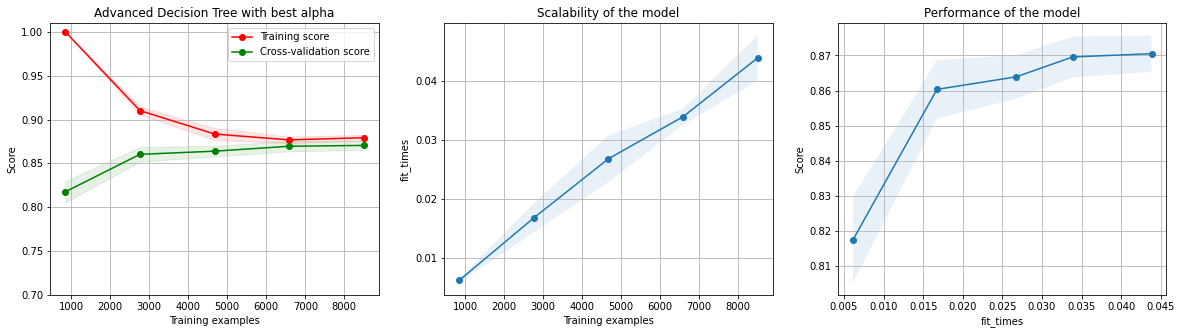

In [21]:
title = "Advanced Decision Tree with best alpha"
plot_learning_curve(
    dt_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [44]:
y_pred_dt_adv_train = cross_val_predict(dt_adv, X_train, y_train, cv=5)
y_pred_dt_adv_test = cross_val_predict(dt_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_dt_adv_train)
precision_train = precision_score(y_train, y_pred_dt_adv_train)
recall_train = recall_score(y_train, y_pred_dt_adv_train)
f1_train = f1_score(y_train, y_pred_dt_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_dt_adv_test)
precision_test = precision_score(y_test, y_pred_dt_adv_test)
recall_test = recall_score(y_test, y_pred_dt_adv_test)
f1_test = f1_score(y_test, y_pred_dt_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_adv_test)

print(f"Train Accuracy of Advanced Decision Tree with best alpha: {accuracy_train:.3f}")
print(f"Train Precision of Advanced Decision Tree with best alpha: {precision_train:.3f}")
print(f"Train Recall of Advanced Decision Tree with best alpha: {recall_train:.3f}")
print(f"Train F1 of Advanced Decision Tree with best alpha: {f1_train:.3f}")
print(f"Train ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of Advanced Decision Tree with best alpha: {accuracy_test:.3f}")
print(f"Test Precision of Advanced Decision Tree with best alpha: {precision_test:.3f}")
print(f"Test Recall of Advanced Decision Tree with best alpha: {recall_test:.3f}")
print(f"Test F1 of Advanced Decision Tree with best alpha: {f1_test:.3f}")
print(f"Test ROC AUC of Advanced Decision Tree with best alpha: {roc_auc_test:.3f}")

Train Accuracy of Advanced Decision Tree with best alpha: 0.870
Train Precision of Advanced Decision Tree with best alpha: 0.716
Train Recall of Advanced Decision Tree with best alpha: 0.792
Train F1 of Advanced Decision Tree with best alpha: 0.752
Train ROC AUC of Advanced Decision Tree with best alpha: 0.844
---
Test Accuracy of Advanced Decision Tree with best alpha: 0.864
Test Precision of Advanced Decision Tree with best alpha: 0.701
Test Recall of Advanced Decision Tree with best alpha: 0.732
Test F1 of Advanced Decision Tree with best alpha: 0.716
Test ROC AUC of Advanced Decision Tree with best alpha: 0.818


In [45]:
y_pred_base_dt_train_f = dt_base.predict(X_train)
y_pred_adv_dt_train_f = dt_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_dt_train_f)
precision_base_train = precision_score(y_train, y_pred_base_dt_train_f)
recall_base_train = recall_score(y_train, y_pred_base_dt_train_f)
f1_base_train = f1_score(y_train, y_pred_base_dt_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_dt_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_dt_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_dt_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_dt_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_dt_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_dt_train_f)

y_pred_base_dt_test_f = dt_base.predict(X_test)
y_pred_adv_dt_test_f = dt_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_dt_test_f)
precision_base_test = precision_score(y_test, y_pred_base_dt_test_f)
recall_base_test = recall_score(y_test, y_pred_base_dt_test_f)
f1_base_test = f1_score(y_test, y_pred_base_dt_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_dt_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_dt_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_dt_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_dt_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_dt_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_dt_test_f)

In [46]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base DT: {accuracy_base_train:.3f}")
print(f"Train Precision of Base DT: {precision_base_train:.3f}")
print(f"Train Recall of Base DT: {recall_base_train:.3f}")
print(f"Train F1 of Base DT: {f1_base_train:.3f}")
print(f"Train ROC of Base DT: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv DT: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv DT: {precision_adv_train:.3f}")
print(f"Train Recall of Adv DT: {recall_adv_train:.3f}")
print(f"Train F1 of Adv DT: {f1_adv_train:.3f}")
print(f"Train ROC of Adv DT: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base DT: {accuracy_base_test:.3f}")
print(f"Test Precision of Base DT: {precision_base_test:.3f}")
print(f"Test Recall of Base DT: {recall_base_test:.3f}")
print(f"Test F1 of Base DT: {f1_base_test:.3f}")
print(f"Test ROC of Base DT: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv DT: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv DT: {precision_adv_test:.3f}")
print(f"Test Recall of Adv DT: {recall_adv_test:.3f}")
print(f"Test F1 of Adv DT: {f1_adv_test:.3f}")
print(f"Test ROC of Adv DT: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base DT: 1.000
Train Precision of Base DT: 1.000
Train Recall of Base DT: 1.000
Train F1 of Base DT: 1.000
Train ROC of Base DT: 1.000
-
Train Accuracy of Adv DT: 0.875
Train Precision of Adv DT: 0.714
Train Recall of Adv DT: 0.829
Train F1 of Adv DT: 0.768
Train ROC of Adv DT: 0.860
---
Test Accuracy of Base DT: 0.846
Test Precision of Base DT: 0.666
Test Recall of Base DT: 0.686
Test F1 of Base DT: 0.676
Test ROC of Base DT: 0.790
-
Test Accuracy of Adv DT: 0.873
Test Precision of Adv DT: 0.696
Test Recall of Adv DT: 0.811
Test F1 of Adv DT: 0.749
Test ROC of Adv DT: 0.851


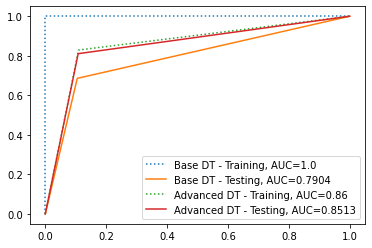

In [47]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_dt_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_dt_train_f), 4)
plt.plot(fpr,tpr,label="Base DT - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_dt_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_dt_test_f), 4)
plt.plot(fpr,tpr,label="Base DT - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_dt_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_dt_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced DT - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_dt_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_dt_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced DT - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()